# 1. IMPORT PACKAGE AND DATASET

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Combine features and target
df = pd.concat([X, y], axis=1)

# Check
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
df.nunique()

,0
age,74
workclass,9
fnlwgt,28523
education,16
education-num,16
marital-status,7
occupation,15
relationship,6
race,5
sex,2


# 2. BASIC PLOTTING

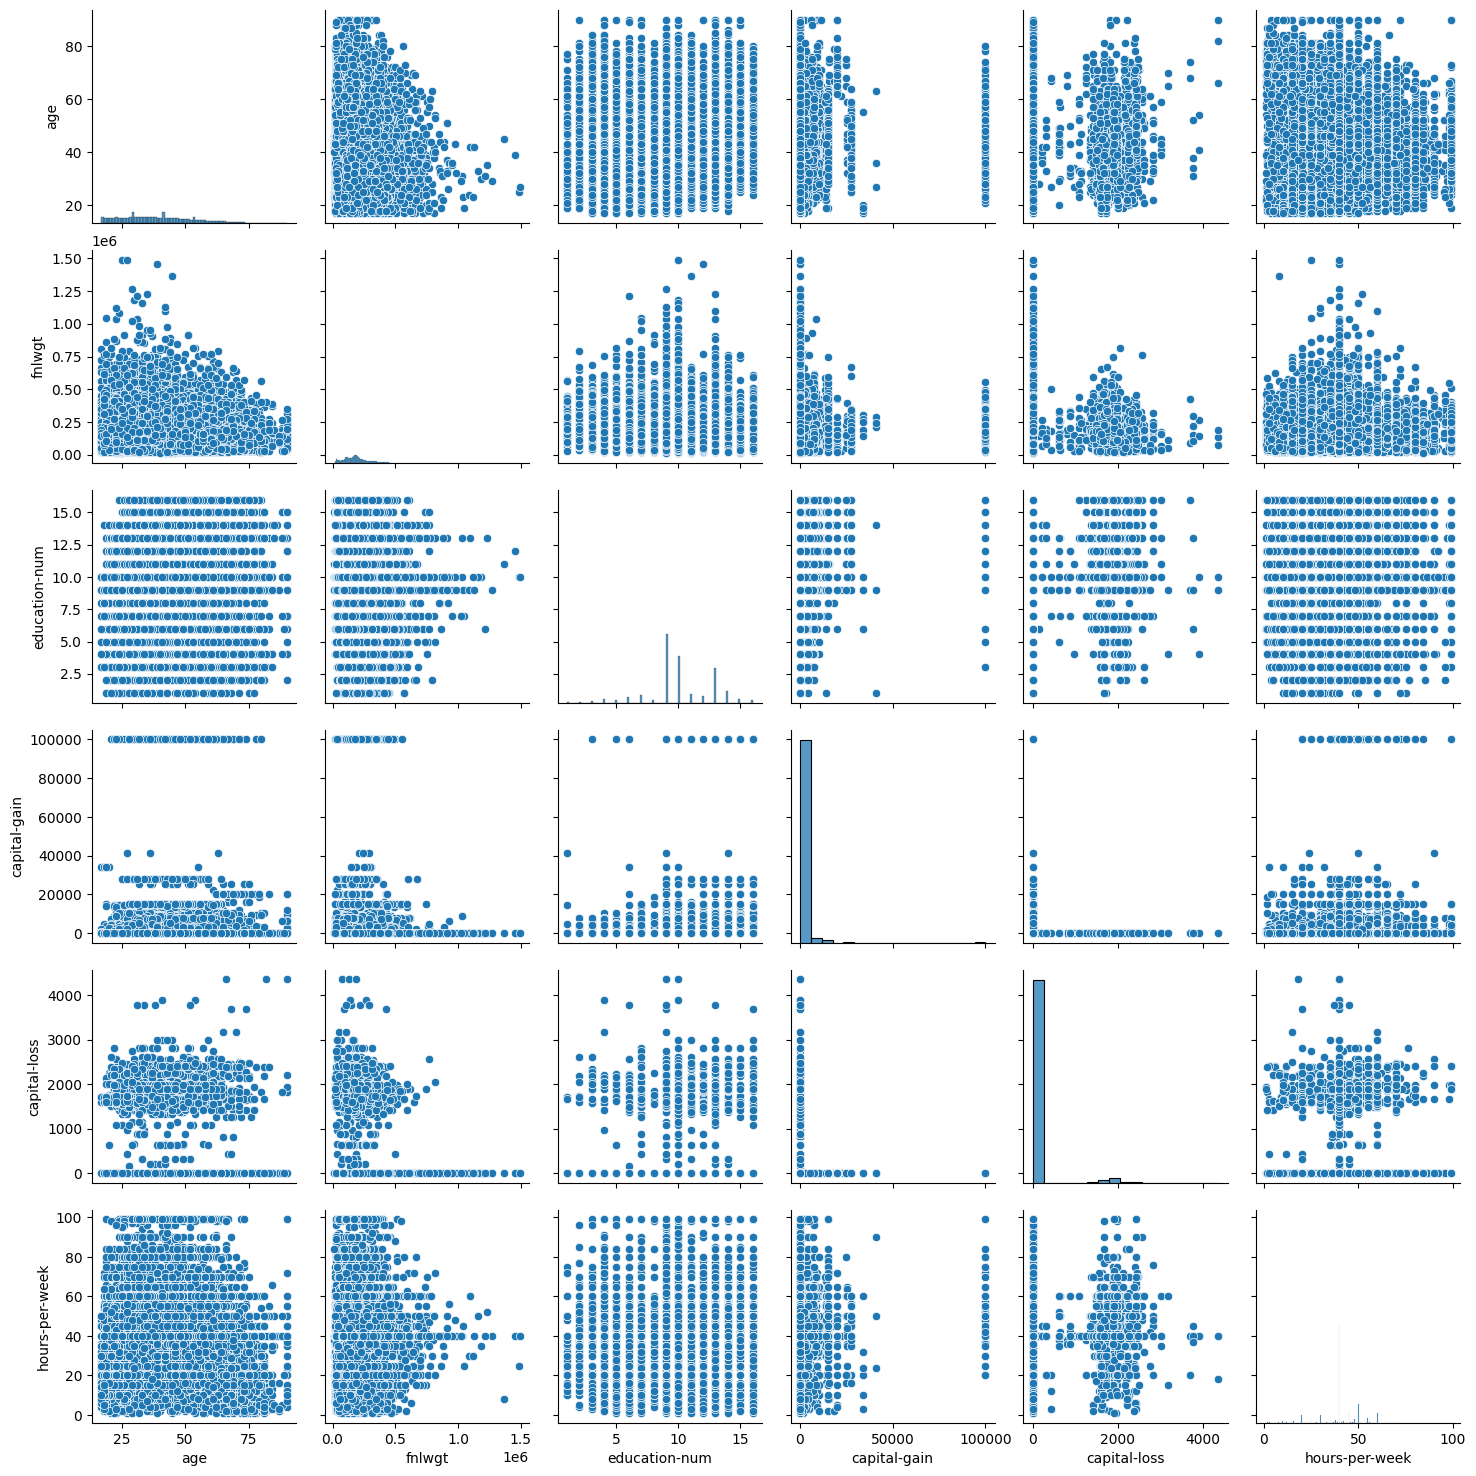

In [9]:
sns.pairplot(df)

In [10]:
df_numeric = df.select_dtypes(include = 'number')

<Axes: >

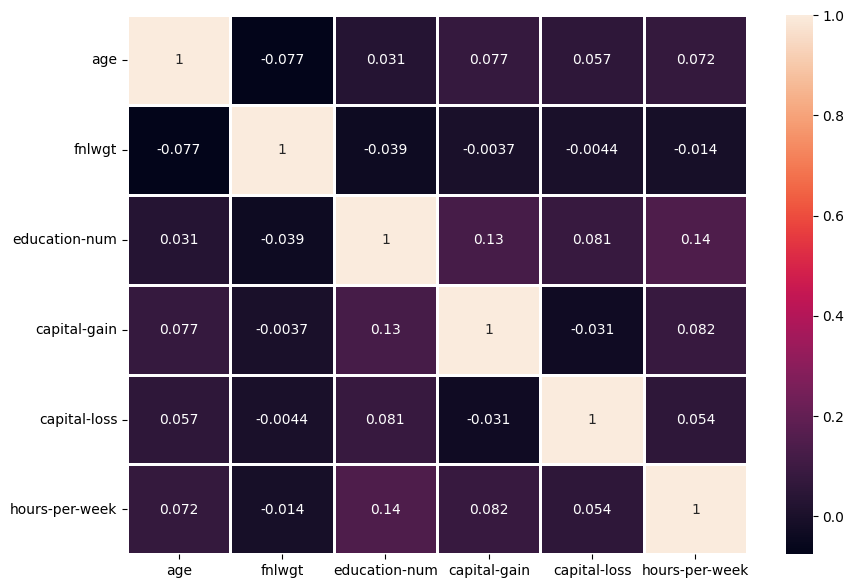

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df_numeric.corr(),annot=True,linewidths=2)

### Univariate analysis

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

age
Skew : 0.56


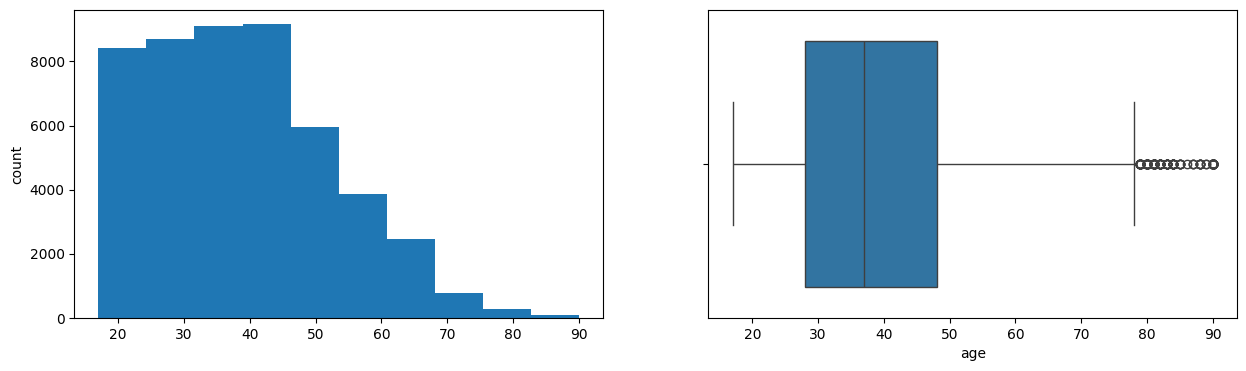

fnlwgt
Skew : 1.44


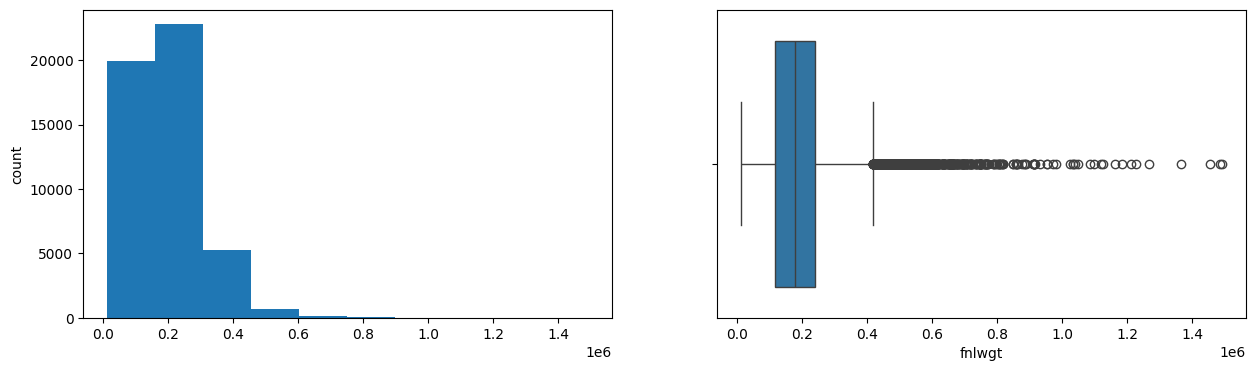

education-num
Skew : -0.32


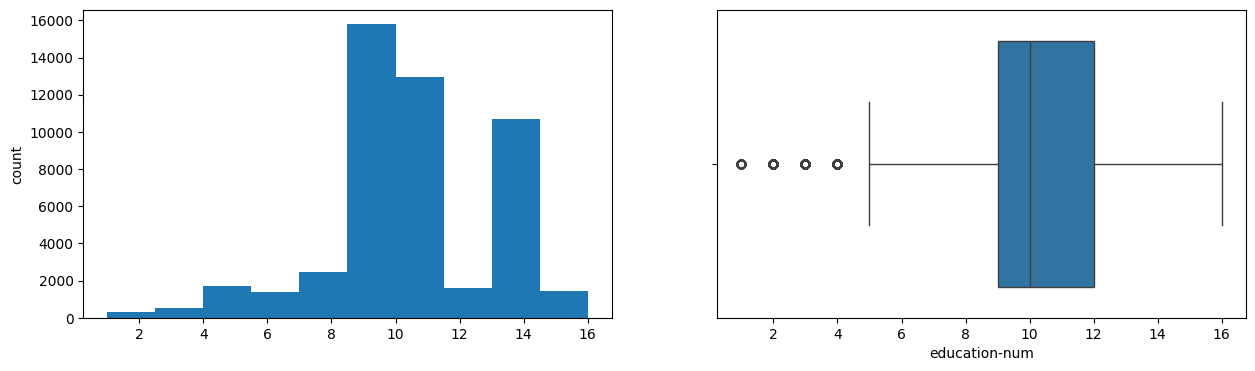

capital-gain
Skew : 11.89


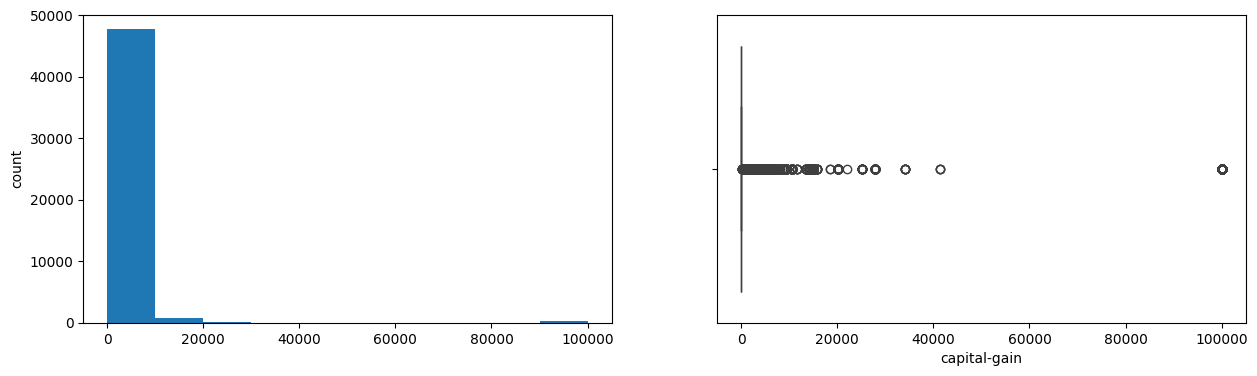

capital-loss
Skew : 4.57


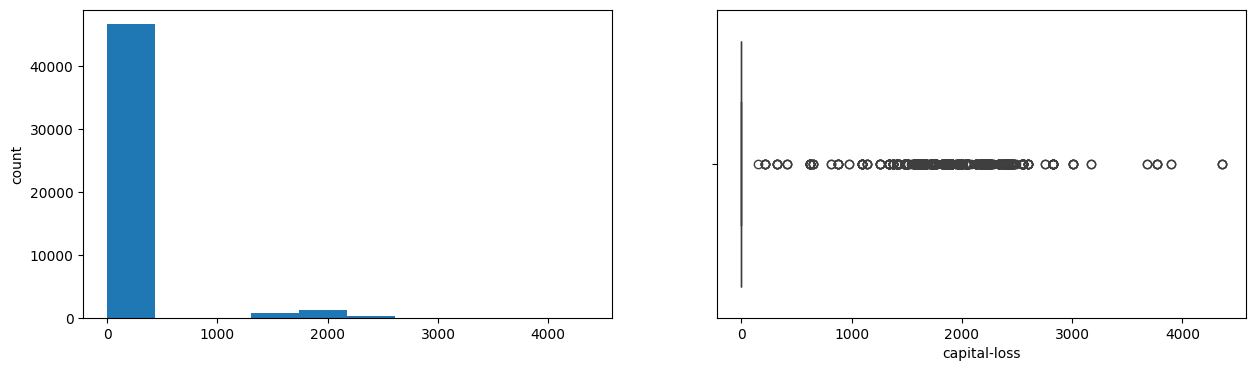

hours-per-week
Skew : 0.24


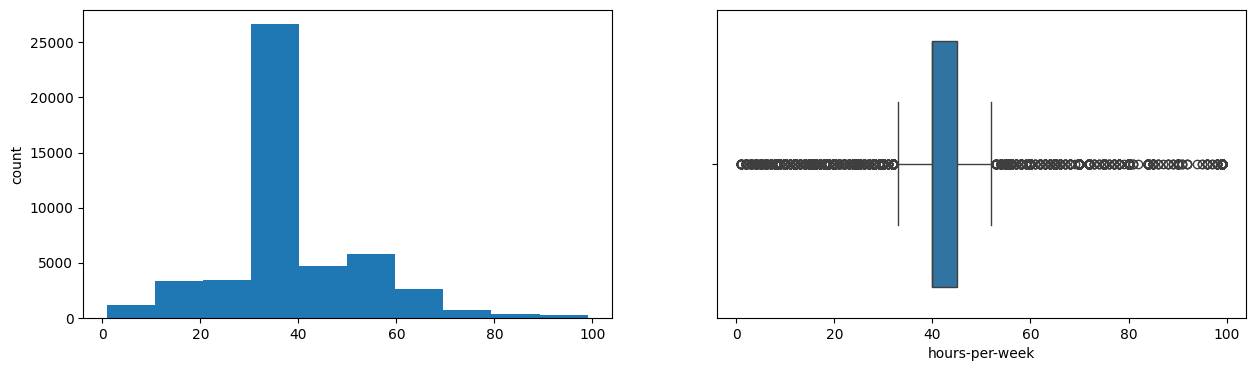

In [13]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

# 3. DATA PREPROCESSING

### Handling missing values

In [14]:
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [15]:
(df.isnull().sum()/(len(df)))*100

,0
age,0.000000
workclass,1.971664
fnlwgt,0.000000
education,0.000000
education-num,0.000000
marital-status,0.000000
occupation,1.977806
relationship,0.000000
race,0.000000
sex,0.000000


In [16]:
df.replace('?', np.nan, inplace=True)

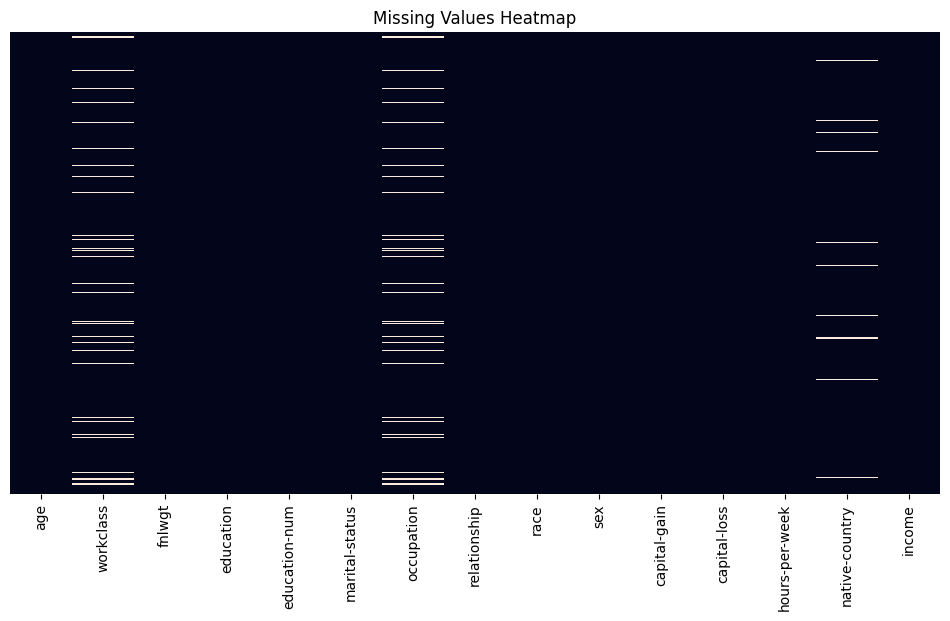

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [18]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-3448830320.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


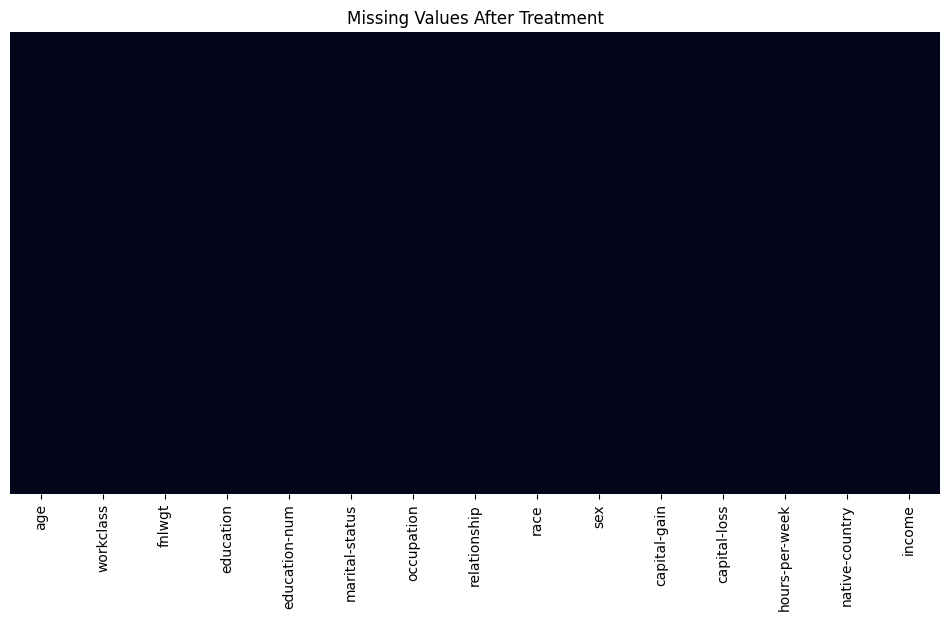

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values After Treatment")
plt.show()

### Outlier detection and removal

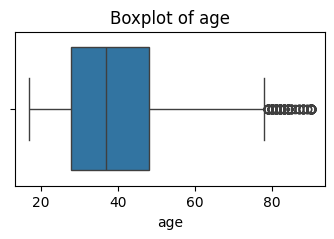

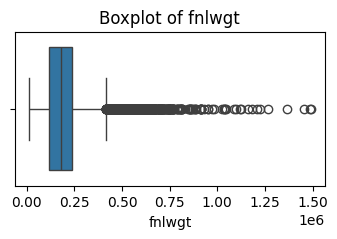

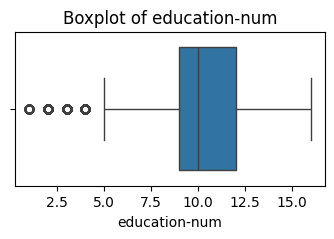

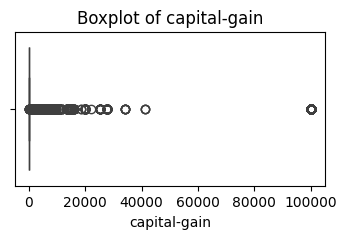

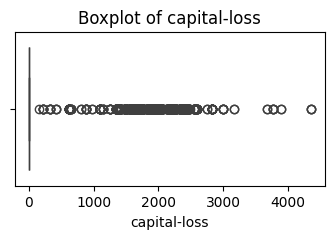

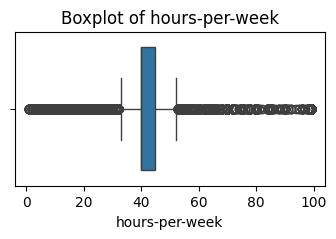

In [20]:
for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [21]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers")

age: 216 outliers
fnlwgt: 1453 outliers
education-num: 1794 outliers
capital-gain: 4035 outliers
capital-loss: 2282 outliers
hours-per-week: 13496 outliers


1. Here age cannot really be an outlier since it is in most cases not mistakenly added but rather shows variation in age.
2. We can drop the feature fnlwgt since its correlation with the target column is very less (-0.014) and has a very small impact on prediction.
3. education-num is technically an ordinal feature (categorical) for the column education so we can ignore it as well.
4. capital-gain and capital-loss as outliers show the trends in economy and should not be treated.
5. Can be treated using outlier method since working 60-99 hour is extreme and can seem unrealistic. So we only cap upper bound.

In [23]:
Q1 = df['hours-per-week'].quantile(0.25)
Q3 = df['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

upper_cap = Q3 + 1.5 * IQR

df['hours-per-week'] = df['hours-per-week'].clip(lower=1, upper=upper_cap)

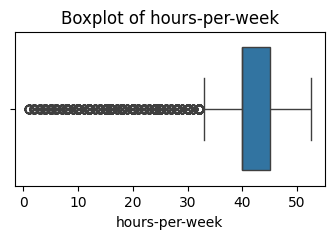

In [24]:
plt.figure(figsize=(4,2))
sns.boxplot(x=df['hours-per-week'])
plt.title(f"Boxplot of hours-per-week")
plt.show()

### Encoding column data

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [26]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40.0,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13.0,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40.0,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40.0,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40.0,4,0


### Scaling numerical data

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [28]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.025996,6,-1.061979,9,1.136512,4,0,1,4,1,0.146932,-0.217127,0.074507,38,0
1,0.828308,5,-1.007104,9,1.136512,2,3,0,4,1,-0.144804,-0.217127,-2.617192,38,0
2,-0.046942,3,0.246034,11,-0.419335,0,5,1,4,1,-0.144804,-0.217127,0.074507,38,0
3,1.047121,3,0.426663,1,-1.197259,2,5,0,2,1,-0.144804,-0.217127,0.074507,38,0
4,-0.776316,3,1.408530,9,1.136512,2,9,5,2,0,-0.144804,-0.217127,0.074507,4,0


### Splitting the data

In [29]:
X = df.drop('income', axis=1)
y = df['income']

In [30]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.025996,6,-1.061979,9,1.136512,4,0,1,4,1,0.146932,-0.217127,0.074507,38
1,0.828308,5,-1.007104,9,1.136512,2,3,0,4,1,-0.144804,-0.217127,-2.617192,38
2,-0.046942,3,0.246034,11,-0.419335,0,5,1,4,1,-0.144804,-0.217127,0.074507,38
3,1.047121,3,0.426663,1,-1.197259,2,5,0,2,1,-0.144804,-0.217127,0.074507,38
4,-0.776316,3,1.408530,9,1.136512,2,9,5,2,0,-0.144804,-0.217127,0.074507,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.025996,3,0.243884,9,1.136512,0,9,1,4,0,-0.144804,-0.217127,-0.324263,38
48838,1.849433,3,1.247492,11,-0.419335,6,9,2,2,1,-0.144804,-0.217127,0.074507,38
48839,-0.046942,3,1.754865,9,1.136512,2,9,0,4,1,-0.144804,-0.217127,1.071433,38
48840,0.390683,3,-1.001612,9,1.136512,0,0,3,1,1,0.587220,-0.217127,0.074507,38


In [31]:
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
48837,1
48838,1
48839,1
48840,1


### Train-Test split

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)